<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/gdrive_examples/Gdrive_dfof_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo notebook for analyzing data located on the lab google drive
* 3/4/2025 setup GT

## cloning and installing a custom module

In [1]:
!git clone https://github.com/GergelyTuri/sleep.git

Cloning into 'sleep'...
remote: Enumerating objects: 1482, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 1482 (delta 155), reused 143 (delta 92), pack-reused 1263 (from 1)
Receiving objects: 100% (1482/1482), 35.66 MiB | 8.56 MiB/s, done.
Resolving deltas: 100% (931/931), done.


In [2]:
%cd sleep
!pip install .

/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.11-py3-none-any.whl size=1011 sha256=2252da1fefb6ee577e5a59c13333985b3382afb020e5a9e64fa2160b423933f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-wxro5m71/wheels/44/bc/4d/cf6c419078388e82f587896982a5516e30bc2dc217362fe959
Successfully built sleep


## Imports

In [18]:
from os.path import join
import matplotlib.pyplot as plt

# custom modul specific imports
from src.classes.suite2p_class import Suite2p as s2p
from src.classes import dfof

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [9]:
# pointer to data
sima_folder = "/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/dock11b1/6_17/TSeries-06172024-0946-001/TSeries-06172024-0946-001.sima/"

In [16]:
s2p_data = s2p(join(sima_folder, "suite2p"))
raw_signal = s2p_data.get_cells()
npil_signal = s2p_data.get_npil()
raw_signal.shape, npil_signal.shape

((447, 24585), (447, 24585))

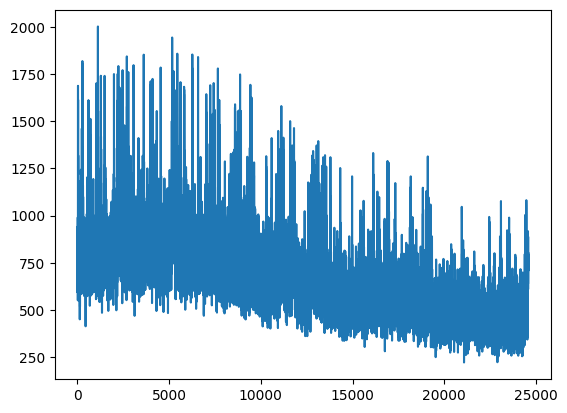

In [15]:
# example plot
plt.plot(raw_signal[0])

In [20]:
dfof_strategy = dfof.Suite2pDFOF()
dfof = dfof_strategy.calculate(raw_signal, npil_signal)

/content/sleep/src/classes/filters.py:34: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  pd.DataFrame(signal).rolling(win_type="gaussian", **kwargs).mean(std=sigma)
/content/sleep/src/classes/filters.py:37: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  return smooth_signal.rolling(**kwargs).min().rolling(**kwargs).max()
/content/sleep/src/classes/filters.py:37: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  return smooth_signal.rolling(**kwargs).min().rolling(**kwargs).max()
/content/sleep/src/classes/filters.py:34: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  pd.DataFrame(signal).rolling(win_type="gaussia

<Axes: >

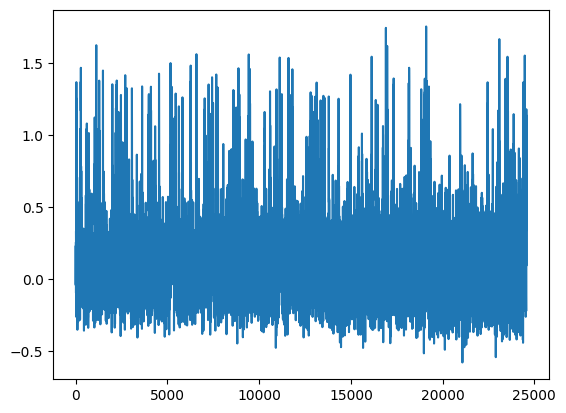

In [25]:
# example plot
dfof.iloc[0].plot()